## Importing all important libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessingimport numpy as np
import pandas as pd
# 4. Model buliding
# 5. Evaluation
# 6. Imporvement
# 7. Website
# 8. deploy

## 1. Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols

In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
1498,ham,Time n Smile r the two crucial things in our l...
5238,ham,Yeah I can still give you a ride
4972,ham,Oops I was in the shower when u called. Hey a ...
2455,ham,"Abeg, make profit. But its a start. Are you us..."
2366,spam,Tone Club: Your subs has now expired 2 re-sub ...


In [10]:
# renaming the columns 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2510,ham,Yunny i'm walking in citylink now Ì_ faster co...
3474,ham,"Night has ended for another day, morning has c..."
4298,ham,Hurt me... Tease me... Make me cry... But in t...
3668,ham,Yeah imma come over cause jay wants to do some...
5210,ham,Dai i downloaded but there is only exe file wh...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']= encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate value
df.duplicated().sum()

403

In [16]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2.EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x2b517f0e650>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '0.2f'),
  Text(0.5533635081542612, -0.23192418555038377, '0.2f')])

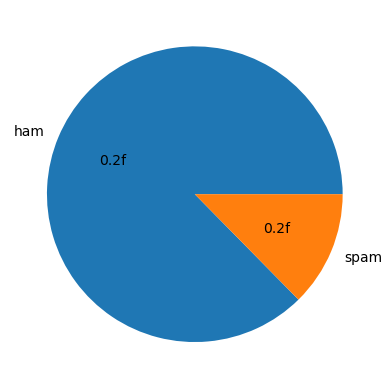

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="0.2f")

In [22]:
# data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [25]:
df['num_charac'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_charac
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# no. of words 
df['num_words']=df['text'].apply(lambda x:len( nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_charac,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_charac,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_charac','num_words','num_sentences']].describe()

,num_charac,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
# ham 
df[df['target']==0][['num_charac','num_words','num_sentences']].describe()

,num_charac,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
#spam
df[df['target']==1][['num_charac','num_words','num_sentences']].describe()

,num_charac,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [34]:
#
import seaborn as sns

<Axes: xlabel='num_charac', ylabel='Count'>

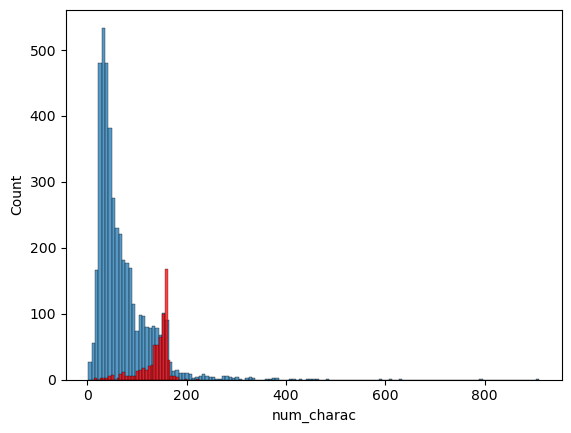

In [35]:
sns.histplot(df[df['target']==0]['num_charac'])
sns.histplot(df[df['target']==1]['num_charac'],color='red')             

<Axes: xlabel='num_words', ylabel='Count'>

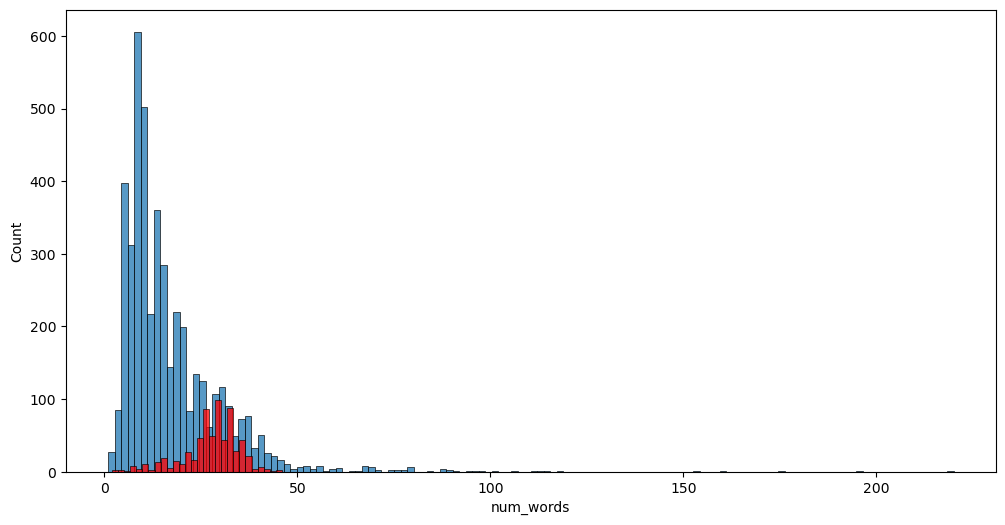

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')             

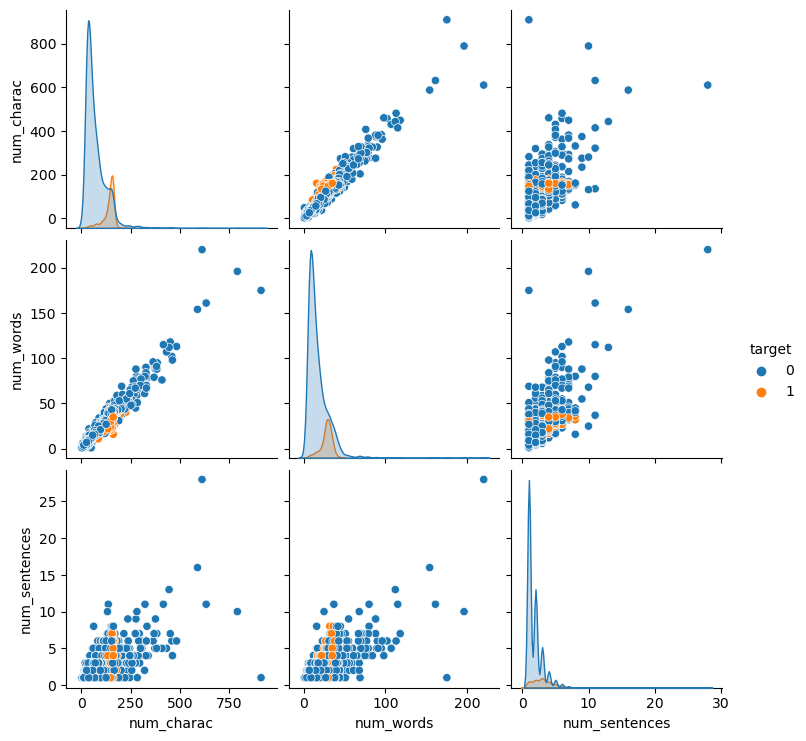

In [37]:
sns.pairplot(df,hue='target')

C:\Users\angel\AppData\Local\Temp\ipykernel_23668\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

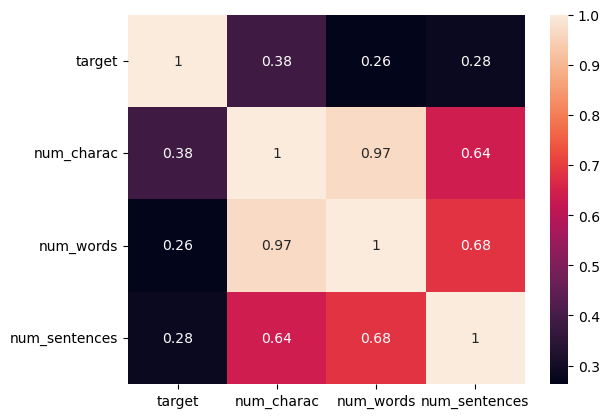

In [38]:
sns.heatmap(df.corr(),annot=True)

## 3. Data preprocessing
#### . Lower case
#### . Tokenization
#### . Removing special characters
#### . removing stop words and punctuation
#### . Stemming

In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
    

In [40]:
import nltk

In [47]:
transform_text('hello, how are you Anjali?')

'hello anjali'

In [43]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [44]:
import string

In [45]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [52]:
transform_text('I loved the yt lecture on Machine Learning')

'love yt lectur machin learn'

In [53]:
df['transformed_text']= df['text'].apply(transform_text)

In [42]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
df.head()

,target,text,num_charac,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

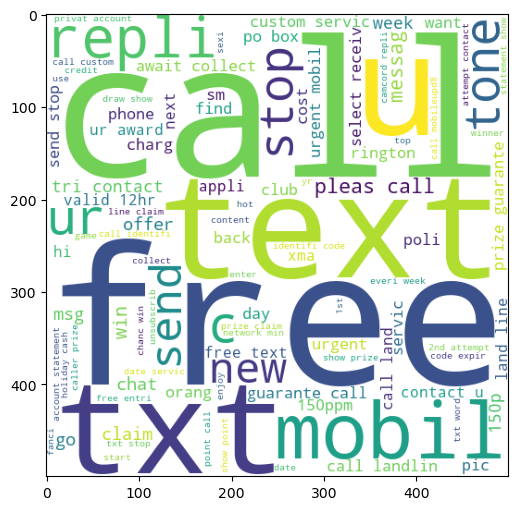

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [56]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

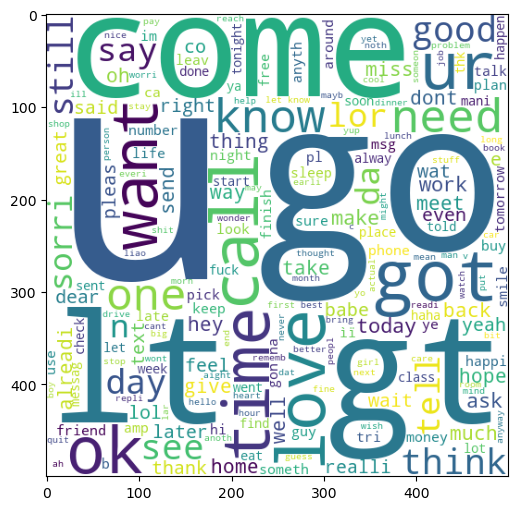

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [58]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [59]:
len(spam_corpus)

9939

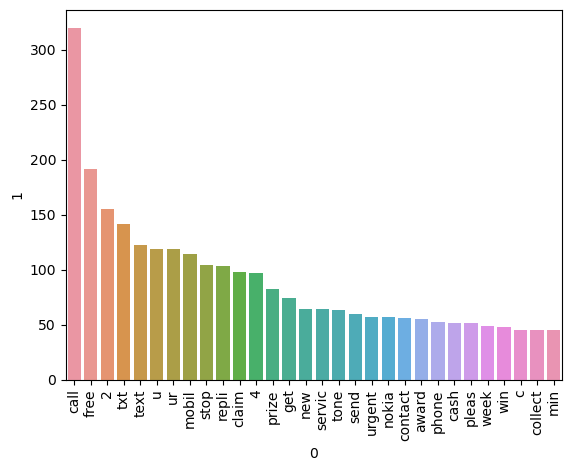

In [60]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],data=pd.DataFrame(Counter(spam_corpus).most_common(30)))
plt.xticks(rotation='vertical')
plt.show()

In [61]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [62]:
len(ham_corpus)

35394

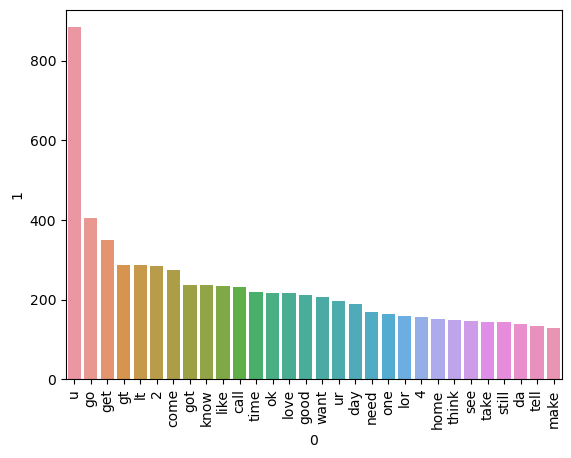

In [63]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],data=pd.DataFrame(Counter(ham_corpus).most_common(30)))
plt.xticks(rotation='vertical')
plt.show()

In [64]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_charac,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [66]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
X.shape


(5169, 3000)

In [69]:
y = df['target'].values

In [70]:
y



array([0, 0, 1, ..., 0, 0, 0])

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [74]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [75]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [76]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [77]:
bnb.fit(x_test,y_test)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9574468085106383
[[889   0]
 [ 44 101]]
1.0


In [78]:
# tfidf....>>bnb

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

In [80]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [81]:
svc = SVC(kernel = 'sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gdbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [82]:
clfs={
    'SVC':svc,
    'kN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gdbc,
    'xgb':xgb
}

In [83]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred= clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [84]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.97678916827853, 0.9548872180451128)

In [85]:
accuracy_scores=[]
precision_scores = []
for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print('for',name)
    print('Accuracy-',current_accuracy)
    print('Precision-',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

for SVC
Accuracy- 0.97678916827853
Precision- 0.9548872180451128
for kN
Accuracy- 0.9042553191489362
Precision- 1.0
for NB
Accuracy- 0.9729206963249516
Precision- 0.9915966386554622
for DT
Accuracy- 0.9342359767891683
Precision- 0.8407079646017699
for LR
Accuracy- 0.9468085106382979
Precision- 0.8688524590163934
for RF
Accuracy- 0.9738878143133463
Precision- 0.9836065573770492
for AdaBoost
Accuracy- 0.9506769825918762
Precision- 0.8671875
for BgC
Accuracy- 0.9613152804642167
Precision- 0.8832116788321168
for ETC
Accuracy- 0.9777562862669246
Precision- 0.9841269841269841
for GBDT
Accuracy- 0.9468085106382979
Precision- 0.95
for xgb
Accuracy- 0.9690522243713733
Precision- 0.937984496124031


In [90]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [91]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.976789,0.954887
1,kN,0.904255,1.000000
2,NB,0.972921,0.991597
3,DT,0.934236,0.840708
4,LR,0.946809,0.868852
5,RF,0.973888,0.983607
6,AdaBoost,0.950677,0.867188
7,BgC,0.961315,0.883212
8,ETC,0.977756,0.984127
9,GBDT,0.946809,0.950000


In [92]:
performance_df1 = pd.melt(performance_df,id_vars = 'Algorithm')